# 🐶 End to End Multi Class Dog Breed Classification

This Notebook builds an end to end multi class image classifier uing TensorFlow 2.0 and TensorFlow Hub.

##Problem

Identifying the breed of the dog given an image of the dog  

Take it this way when you are sitting somewhere casually and a dog walks past you and you want to know what dog breed it is

##Data

The data that was being used is from Kaggle,s Dog breed identification competition.

https://www.kaggle.com/c/dog-breed-identification/data

##Evaluation

Evaluated on Multi Class Log Loss between the predicted probability and the observed target.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

##Features

Some information about data:

* We're dealing with images(Unstructured data) so it is best we use Deep learning / Transfer Learning

* There are around 20000+ images in both Test and Train data



In [ ]:
#Unzip the data from Kaggle in the cloud


### Our workspace

* Import TensorFlow 2.0 
* Import TensorFlow Hub
* Make we're using a GPU 

In [ ]:
#Import TensorFlow into colab as tf
import tensorflow as tf
print('TensorFlow Version' , tf.__version__)


TensorFlow Version 2.2.0


In [ ]:
#Import Necessary Tools
import tensorflow_hub as hub
print('TensorFlow Hub Version' , hub.__version__)

#Check for GPU availability
print('GPU is available! 😃'if tf.config.list_physical_devices('GPU') else 'Not available')

TensorFlow Hub Version 0.8.0
GPU is available! 😃


#Getting our data ready
With all the machine learning models , our data has to be in numerical format . So that is we will be doing first. Turning our images into Tensors

Lets start by accesing our data



In [ ]:
#Checkout our labels
import pandas as pd
labels_csv = pd.read_csv('drive/My Drive/Dog Vision/labels.csv')
print(labels_csv.describe())
print(labels_csv.head())


                                      id               breed
count                              10222               10222
unique                             10222                 120
top     ae9566fed2f45407a4282a6677652c0f  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


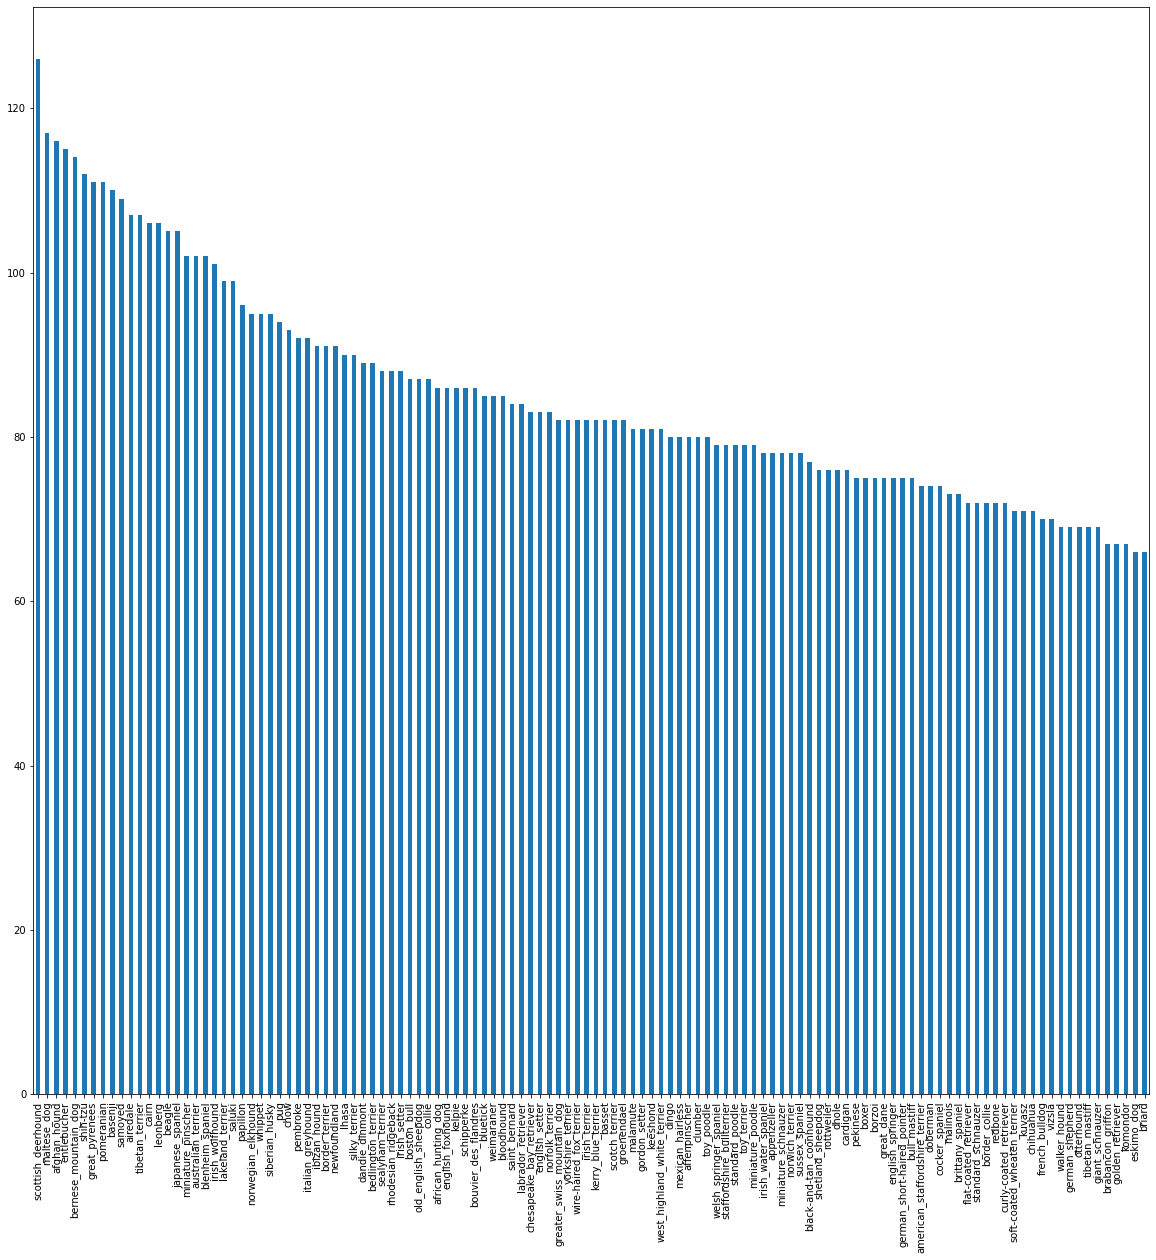

In [ ]:
# How many images are there of each breed?
labels_csv['breed'].value_counts().plot.bar(figsize = (20,20))

In [ ]:
labels_csv['breed'].value_counts().median()

82.0

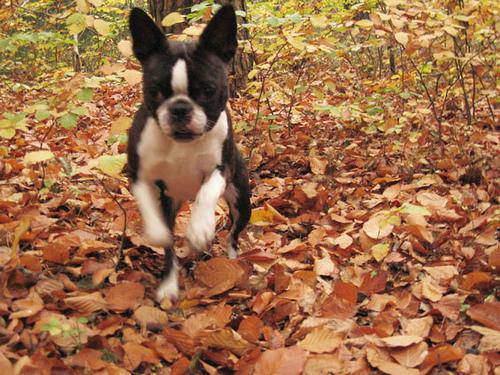

In [ ]:
#Lets view an image
from IPython.display import Image
Image('drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

In [ ]:
# Create Path names for image ID's
file_names = ['drive/My Drive/Dog Vision/train/' + fname + '.jpg' for fname in labels_csv['id'] ]

file_names

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 'drive/My Drive/Dog Vision/train/004396df1acd0f1247b740ca2b14616e.jpg',
 'drive/My Drive/Dog Vision/train/0067dc3eab0b3c3ef0439477624d85d6.jpg',
 'drive/My Drive/Dog Vision/train/00693b8bc2470375cc744a6391d397ec.jpg',
 'drive/My Drive/Dog Vision/train/006cc3ddb9dc1bd82

In [ ]:
#Check whether number of filenames matches number of actual image files
import os
if len(os.listdir('drive/My Drive/Dog Vision/train')) == len(file_names):
  print('Proceed')
else:
  print('Something is wrong')

Proceed


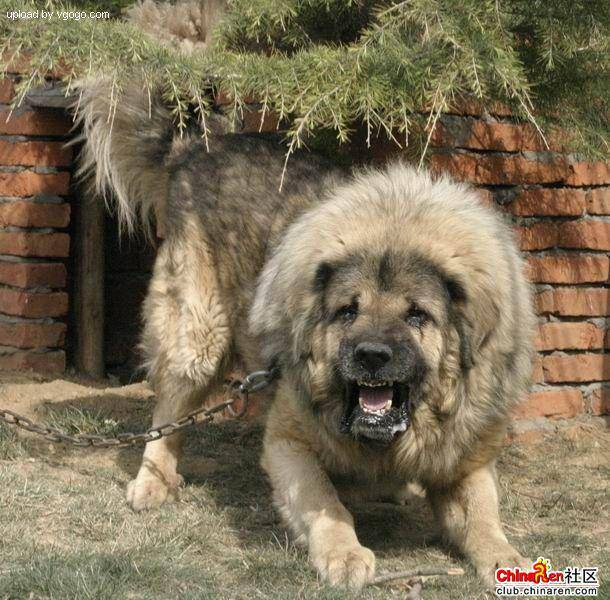

In [ ]:
# One moe check
Image(file_names[9000])

In [ ]:
import numpy as np
labels = labels_csv['breed'].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
# Check if number of labels is same as number of files
if len(labels) == len(file_names):
  print('Yes')

Yes


In [ ]:
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
#Turning boolean array into integers
print(labels[0])
print(np.where(unique_breeds == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
file_names[:10]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

#Creating our own validation set

Since th dataset from kaggle doesnt come with a validation set, we are going to create our own

In [ ]:
#Setup X & y variables
X = file_names
y= boolean_labels

We are going to start off experimenting with 1000 images and increase gradually

In [ ]:
# Set number of images to use for experimenting

NUM_IMAGES = 1000 

In [ ]:
# Lets Split our data
from sklearn.model_selection import train_test_split


X_train, X_val , y_train , y_val = train_test_split(X[:NUM_IMAGES],
                                                     y[:NUM_IMAGES],
                                                     test_size = 0.2,
                                                     random_state=42)
len(X_train) , len(y_train) , len(X_val) , len(y_val)

(800, 800, 200, 200)

## Preprocessing images (Tuning images into Tensors)

To preprocess images into tensors we are going to write a funtion which does a few things

1 . Take an image path as input          
2 . Use TF to read the file and save it to a variable , 'image'     
3 . Turn our image (a jpg) into tensor      
4 . Resize the image to be a shape of (224,224)        
5 . Return the modified image

In [ ]:
# Convert Image into Numpy array
from matplotlib.pyplot import imread
image = imread(file_names[42])
image.shape

(257, 350, 3)

In [ ]:
#Turns an image into tensor
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

Now we have seen what an image looks like as a tensor ,Lets create a function

In [ ]:
# Define Image Size
IMG_SIZE = 224

#Create a function of preprocessing images
def process_image(image_path , image_size = IMG_SIZE):
  #Read an image file
  image = tf.io.read_file(image_path)
  # Turn jpeg into numerical tensor
  image = tf.image.decode_jpeg(image , channels =3)
  # Convert the color channel values from 0 - 255 to 0-1 values
  image = tf.image.convert_image_dtype(image , tf.float32)
  #Resize 
  image = tf.image.resize(image , size = (IMG_SIZE , IMG_SIZE))


  return image
                                       


## Turning our data into Batches
Why turn our data into batches
Lets say you are trying to process 10000+ images in one go....They all might not fit the memory
So that is why we about 32 images at a time

In [ ]:
#Create a function to return a tuple(image,label)
def get_image_label(image_path , label):
  image = process_image(image_path)
  return image , label

In [ ]:
(process_image(X[42]),y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [ ]:
# Define a batch size
BATCH_SIZE = 32

# Create a func
def create_data_batch(X, y = None,batch_size = BATCH_SIZE , valid_data = False , test_data = False ):
  if test_data:
    print('Creating test data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  elif valid_data:
    print('Creating validated data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                            tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  else:
    print('Creating test data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                             tf.constant(y)))
    data = data.shuffle(buffer_size = len(X))

    data = data.map(get_image_label)

    data_batch = data.batch(BATCH_SIZE)
  return data_batch
  

In [ ]:
# Creating training and validation data batches
train_data = create_data_batch(X_train , y_train)
val_data = create_data_batch(X_val,y_val , valid_data = True)


Creating test data batches...
Creating validated data batches...


In [ ]:
train_data.element_spec , val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing data


In [ ]:
import matplotlib.pyplot as plt

# Create a function for viweing images in data batch
def show_25_images(images , labels):
  plt.figure(figsize = (10 , 10))
  for i in range(25):
    ax = plt.subplot(5 , 5 , i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])

In [ ]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
train_images , train_labels = next(train_data.as_numpy_iterator())
train_images , train_labels

(array([[[[0.66605395, 0.838603  , 0.40330887],
          [0.7360907 , 0.9086398 , 0.4733456 ],
          [0.73823535, 0.91078436, 0.4754902 ],
          ...,
          [0.4880515 , 0.32726717, 0.2096201 ],
          [0.38480395, 0.22401962, 0.10637256],
          [0.33927697, 0.17849265, 0.06084559]],
 
         [[0.6720195 , 0.84127724, 0.415857  ],
          [0.7285824 , 0.89784014, 0.47241995],
          [0.7258414 , 0.8958706 , 0.4681362 ],
          ...,
          [0.5673517 , 0.40656734, 0.2955029 ],
          [0.57544315, 0.41465887, 0.3035944 ],
          [0.57157195, 0.4107876 , 0.29972318]],
 
         [[0.67535996, 0.85260093, 0.42907152],
          [0.71444875, 0.8916897 , 0.46816027],
          [0.7060618 , 0.8835489 , 0.458608  ],
          ...,
          [0.66014755, 0.5022344 , 0.40104386],
          [0.7445149 , 0.5866017 , 0.4854112 ],
          [0.7456594 , 0.5877462 , 0.48655573]],
 
         ...,
 
         [[0.56758875, 0.73853916, 0.4370773 ],
          [0.55118

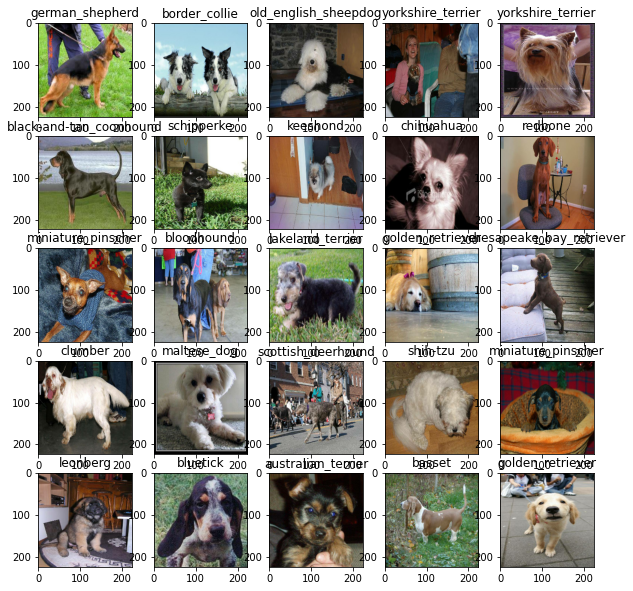

In [ ]:
show_25_images(train_images , train_labels)

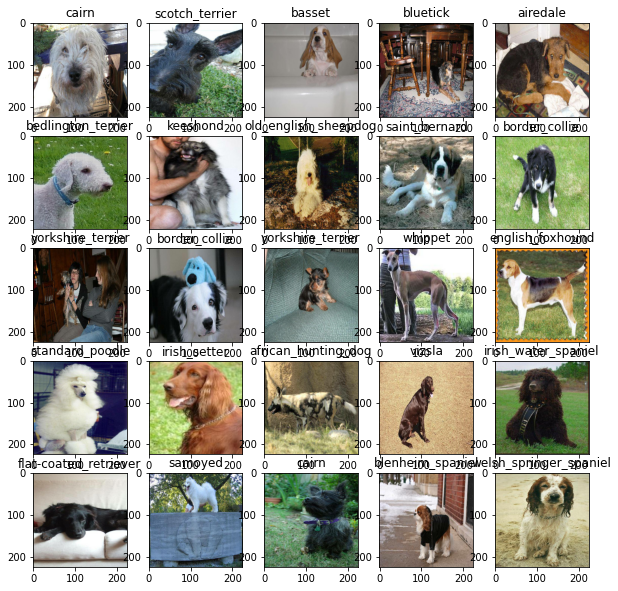

In [ ]:
# Now elts visualize our validation set
val_images , val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images , val_labels)

## Building a model

Before we build a model , there are few things we need to define :
* The input shape
* The output shape
* The URL of model we want to use

In [ ]:
# Setup input shape
INPUT_SHAPE = [None , IMG_SIZE , IMG_SIZE , 3]

OUTPUT_SHAPE = len(unique_breeds)
# From TFHub
MODEL_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4'

Now we have got our inputs , outputs and URL of the model   
Lets put them in Keras Deep learning model


In [ ]:
# Create a func to create a keras model
def create_model(input = INPUT_SHAPE , output = OUTPUT_SHAPE , model_url = MODEL_URL):

#Setting up the model layers

    model = tf.keras.Sequential([
        hub.KerasLayer(MODEL_URL),
        tf.keras.layers.Dense(units = OUTPUT_SHAPE,
                              activation = 'softmax')
        ])

# Compile the model
    model.compile(
       loss = tf.keras.losses.CategoricalCrossentropy(),
       optimizer = tf.keras.optimizers.Adam(),
       metrics = ('accuracy')

)
#Build the model
    model.build(INPUT_SHAPE)

    return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [ ]:
outputs = np.ones(shape = (1,1,1280))
outputs

array([[[1., 1., 1., ..., 1., 1., 1.]]])

In [ ]:
# Create some call backs
#Call backs are helper functions used to save its process , check its process or stop it from running
# 1 Check the process
# 2 Stop from training

In [ ]:
# Load Tensorboard
%load_ext tensorboard

In [ ]:
import datetime

#Create a func to build a tensorboard callback
def create_tensorboard_callback():
  #Create a log directory
  logdir = os.path.join('drive/My Drive/Dog Vision/Logs',
                        datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  return tf.keras.callbacks.TensorBoard(logdir)


In [ ]:
# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                  patience = 3)

In [ ]:
# Training our model
NUM_EPOCHS = 100 #@param{type : 'slider,min : 10 , max : 100,step = 10}



In [ ]:
#Lets write a func to train a model.
def train_model():
  model = create_model()
  tensorboard = create_tensorboard_callback()
  model.fit(x = train_data,
            epochs = NUM_EPOCHS,
            validation_data = val_data,
            validation_freq = 1,
            callbacks = [tensorboard , early_stopping])
  return model



In [ ]:
model = train_model()

Epoch 1/100
25/25 [==============================] - 782s 31s/step - loss: 4.5454 - accuracy: 0.1150 - val_loss: 3.3154 - val_accuracy: 0.2650
Epoch 2/100
25/25 [==============================] - 6s 247ms/step - loss: 1.6330 - accuracy: 0.6862 - val_loss: 2.1119 - val_accuracy: 0.4900
Epoch 3/100
25/25 [==============================] - 6s 249ms/step - loss: 0.5589 - accuracy: 0.9450 - val_loss: 1.6521 - val_accuracy: 0.6100
Epoch 4/100
25/25 [==============================] - 6s 250ms/step - loss: 0.2519 - accuracy: 0.9850 - val_loss: 1.4808 - val_accuracy: 0.6350
Epoch 5/100
25/25 [==============================] - 6s 252ms/step - loss: 0.1466 - accuracy: 0.9987 - val_loss: 1.4042 - val_accuracy: 0.6500
Epoch 6/100
25/25 [==============================] - 6s 251ms/step - loss: 0.0988 - accuracy: 0.9987 - val_loss: 1.3570 - val_accuracy: 0.6500
Epoch 7/100
25/25 [==============================] - 6s 251ms/step - loss: 0.0749 - accuracy: 1.0000 - val_loss: 1.3329 - val_accuracy: 0.6500

In [ ]:
%tensorboard --logdir drive/My\ Drive/Dog\ Vision/Logs

<IPython.core.display.Javascript object>

In [ ]:
# Making predictions
predictions = model.predict(val_data, verbose = 1)
predictions

7/7 [==============================] - 1s 161ms/step


array([[4.58539464e-03, 2.44387105e-04, 9.31779796e-04, ...,
        7.38445437e-04, 3.12114425e-04, 2.17946782e-03],
       [6.11296215e-04, 3.49533453e-04, 3.62704531e-03, ...,
        1.20728844e-04, 1.32847403e-03, 3.67432258e-05],
       [1.00855905e-05, 1.08023451e-04, 1.13364513e-05, ...,
        3.00589963e-05, 2.82293313e-05, 5.78765030e-05],
       ...,
       [1.94823879e-04, 4.58096882e-04, 1.21741185e-04, ...,
        4.18484909e-04, 1.21611974e-03, 5.20044559e-05],
       [3.76995886e-03, 3.33141710e-04, 4.68080871e-05, ...,
        9.70284818e-05, 1.24753496e-04, 2.71984842e-02],
       [1.05543557e-04, 1.06838443e-05, 7.35799898e-04, ...,
        6.79193018e-03, 7.05885002e-04, 9.89406253e-05]], dtype=float32)

In [ ]:
predictions.shape

(200, 120)

In [ ]:
np.sum(predictions[0])

0.99999994

In [ ]:
index = 7
print(predictions[0])
print(f"Max Value (probability of prediction) :  {np.max(predictions[index])}")
print(f"Sum : {np.sum(predictions[index])}")
print(f"Max Index : {np.argmax(predictions[index])}")
print(f"Predicted label : {unique_breeds[np.argmax(predictions[index])]}")

[4.58539464e-03 2.44387105e-04 9.31779796e-04 1.94970722e-04
 5.19319321e-04 2.00824594e-04 1.19797969e-02 7.06752588e-04
 4.43828088e-04 6.99050492e-04 2.42196117e-03 5.93346304e-05
 2.75038794e-04 4.33183130e-04 4.15115588e-04 5.66987379e-04
 6.42923769e-05 4.67451923e-02 1.61008851e-04 7.87276003e-05
 1.31316704e-03 5.66943607e-04 7.14052876e-05 1.35819684e-03
 4.73245054e-05 9.30835202e-04 2.49577761e-01 6.06313697e-04
 4.65643033e-03 4.05786122e-04 1.61769931e-04 4.77119256e-03
 9.52173083e-04 5.12847000e-05 1.58426934e-04 1.52333546e-02
 2.21493305e-04 2.07897057e-04 2.35671597e-03 2.63196416e-04
 7.51764746e-04 9.90992630e-05 1.53665169e-04 4.49305458e-04
 2.18563306e-04 2.05483215e-04 2.12889630e-04 1.64584453e-05
 4.35400842e-04 4.99887683e-04 3.82996921e-04 1.04439954e-04
 7.19517004e-04 1.12428665e-04 1.93257802e-04 7.85431912e-05
 1.41695215e-04 2.39849091e-03 1.29890651e-03 1.77313894e-01
 1.23116747e-03 3.98112315e-05 7.26709887e-03 9.57234806e-05
 2.69043678e-03 2.438788

In [ ]:
#Transform prediction probabilities into prediction labels
def get_pred_label(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)]

pred_label= get_pred_label(predictions[94])
pred_label


'malamute'

In [ ]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
def unbatchify(data):
  # Create a func to unbatch a dataset
     images = []
     labels = []

#Loop through unbatced data
     for image , label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_breeds[np.argmax(label)])

     return images , labels

val_images, val_labels = unbatchify(val_data)
val_images[0] , val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
val_images , val_labels = unbatchify(val_data)

In [ ]:
val_images[0] , val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
def plot_pred(prediction_probabilities , labels , images , n=1):
  pred_prob , true_label , image = prediction_probabilities[n], labels[n], images[n]
  pred_label = get_pred_label(pred_prob)

  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'


  plt.title('{} {:2.0f}% {}'.format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
            color = color)

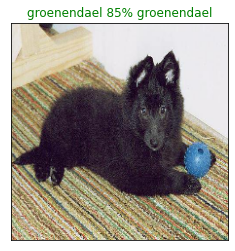

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels = val_labels,
          images = val_images,
          n = 77)

In [ ]:
def plot_pred_conf(prediction_probabilities , labels , n=1):
  pred_prob , true_label = prediction_probabilities[n] , labels[n]

  pred_label = get_pred_label(pred_prob)

  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  top_10_pred_values = pred_prob[top_10_pred_indexes]

  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color = 'grey')
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels = top_10_pred_labels,
             rotation = 'vertical')
  
  if np.isin(true_label , top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color('green')
  else:
    pass


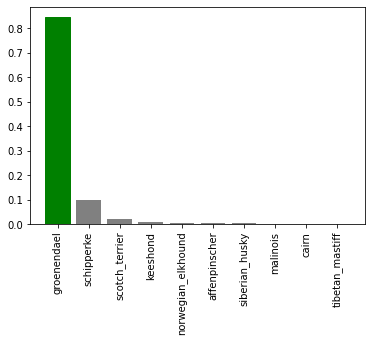

In [ ]:
plot_pred_conf(prediction_probabilities = predictions,
               labels = val_labels,
               n = 77)

Saving & Loading our model

In [ ]:
def save_model(model , suffix = None):
  modeldir = os.path.join("drive/My Drive/Dog Vision/Mo" ,
                          datetime.datetime.now().strftime('%Y%m%d-%H%M%s'))
  model_path = modeldir + '-' +suffix + '.h5'
  print(f'Saving model to {model_path}...')
  model.save(model_path)
  return model_path

In [ ]:
def load_model(model_path):
  print(f'Loading a Saved model{model_path}')
  model = tf.keras.models.load_model(model_path,
                                     custom_objects = {'KerasLayer':hub.KerasLayer})
  return model

In [ ]:
# Save our model trained on 1000 images
save_model(model, suffix = '1000images_model_Adam')

Saving model to drive/My Drive/Dog Vision/Mo/20200609-15101591715455-1000images_model_Adam.h5...


'drive/My Drive/Dog Vision/Mo/20200609-15101591715455-1000images_model_Adam.h5'

In [ ]:
loaded_image_model = load_model('drive/My Drive/Dog Vision/Mo/20200609-07481591688913-1000images_model_Adam.h5')

Loading a Saved modeldrive/My Drive/Dog Vision/Mo/20200609-07481591688913-1000images_model_Adam.h5


In [ ]:
model.evaluate(val_data)

7/7 [==============================] - 1s 144ms/step - loss: 1.3115 - accuracy: 0.6450


[1.3115417957305908, 0.6449999809265137]

In [ ]:
loaded_image_model.evaluate(val_data)

7/7 [==============================] - 1s 142ms/step - loss: 1.2427 - accuracy: 0.6500


[1.2427339553833008, 0.6499999761581421]

In [ ]:
len(X),len(y)

(10222, 10222)

In [ ]:
#Create a data batch with full dataset
full_data = create_data_batch(X,y)

Creating test data batches...


In [ ]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
full_model = create_model()

In [ ]:
full_model_tensorboard = create_tensorboard_callback()
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'accuracy',
                                                             patience = 3)

In [ ]:
# Fit the fullmodel to full data
full_model.fit(x=full_data,
               epochs = NUM_EPOCHS,
               callbacks = [full_model_tensorboard , full_model_early_stopping])

Epoch 1/100
149/320 [============>.................] - ETA: 1:09:05 - loss: 2.0497 - accuracy: 0.5459

In [ ]:
save_model(full_model ,suffix = 'Full_Image_Set__mobilenetV2_Adam' )

In [ ]:
loaded_full_model = load_model('drive/My Drive/Dog Vision/Mo/20200609-10141591697642-Full_Image_Set__mobilenetV2_Adam.h5')

In [ ]:
# Making predictions on the test data
test_path = 'drive/My Drive/Dog Vision/test/'
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

In [ ]:
# Create test data batch
test_data =create_data_batch(test_filenames, test_data = True)

In [ ]:
test_data

## Making predictions on custom images

In [ ]:
custom_path = 'drive/My Drive/Dog Vision/Puppies/'
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
custom_image_paths

In [ ]:
# Turn custom images into batch datasets
custom_data = create_data_batch(custom_image_paths, test_data = True)
custom_data

In [ ]:
custom_preds = loaded_full_model.predict(custom_data)

In [ ]:
custom_preds

In [ ]:
custom_preds.shape

In [ ]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

In [ ]:
# Get the custom images
custom_images = []
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

In [ ]:
plt.figure(figsize = (30,10))
for i, image in enumerate(custom_images):
  plt.subplot(1 ,8 , i+1 )
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)
